# Аналитика отзывов


## ⚠️ ВАЖНО: Порядок выполнения ячеек

**Обязательно выполняйте ячейки по порядку сверху вниз!**

1. Сначала запустите ячейку с импортами (Cell 1)
2. Затем ячейку с загрузкой данных (Cell 2)
3. Затем ячейку с предобработкой (Cell 3)
4. После этого можно запускать остальные ячейки с графиками

Или используйте меню: **Cell → Run All** для запуска всех ячеек сразу.

## Цели анализа:
- Распределение рейтингов
- Анализ по источникам (2GIS, Yandex)
- Динамика отзывов во времени
- Анализ длины отзывов
- Топ авторов


In [14]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
# Пробуем разные варианты стилей для совместимости
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        try:
            plt.style.use('dark_background')
        except:
            plt.style.use('default')

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Для корректного отображения русских символов
plt.rcParams['font.family'] = 'DejaVu Sans'

print("✅ Библиотеки успешно импортированы")
print(f"📦 Pandas версия: {pd.__version__}")
print(f"📦 Matplotlib версия: {plt.matplotlib.__version__}")
print(f"📦 Seaborn версия: {sns.__version__}")


✅ Библиотеки успешно импортированы
📦 Pandas версия: 2.3.2
📦 Matplotlib версия: 3.10.6
📦 Seaborn версия: 0.13.2


In [15]:
# Загрузка данных
# Путь относительно корня проекта (ноутбук находится в docs/)
import os

# Определяем правильный путь к файлу
data_path = '../data/all_reviews.csv'

# Проверяем существование файла
if not os.path.exists(data_path):
    # Пробуем альтернативный путь (если запускается из корня проекта)
    alt_path = 'data/all_reviews.csv'
    if os.path.exists(alt_path):
        data_path = alt_path
    else:
        raise FileNotFoundError(
            f"❌ Файл не найден!\n"
            f"   Пробовали пути:\n"
            f"   - {os.path.abspath('../data/all_reviews.csv')}\n"
            f"   - {os.path.abspath('data/all_reviews.csv')}\n"
            f"💡 Убедитесь, что файл data/all_reviews.csv существует"
        )

df_all = pd.read_csv(data_path, encoding='utf-8-sig')

# Просмотр структуры данных
print(f"📊 Общее количество отзывов: {len(df_all)}")
print(f"\n📋 Структура данных:")
print(df_all.head(10))
print(f"\n📈 Информация о данных:")
print(df_all.info())
print(f"\n📊 Статистика по числовым колонкам:")
print(df_all.describe())


📊 Общее количество отзывов: 2772

📋 Структура данных:
           id                                               text  rating  \
0  twogis_000  Вкусная еда, авторские коктейли, приятное обсл...       3   
1  twogis_001  Неплохо, ел Рамен и ребраС звкзд с неба не хва...       3   
2  twogis_002          Замечательная кухня и прекрасный персонал       3   
3  twogis_003                             Очень вкусные коктейли       3   
4  twogis_004  Очень вкусная еда. Пробовали почти все закуски...       3   
5  twogis_005  Место невероятное!\nКлассное, стильное, интере...       3   
6  twogis_006  очень приятное место и стаф! вкусные блюда, на...       3   
7  twogis_007  Польстилась на отзывы, действительно обслужива...       3   
8  twogis_008  Кормилица 🥺\nОбожаю такие андеграундные местеч...       3   
9  twogis_009  Место ТОП. Атмосфера, обслуживание, еда.\nНо с...       3   

              author        date source  
0      МарияМурзаева  2025-11-14   2GIS  
1       АндрейШавнев  202

In [16]:
# Предобработка данных
# Проверяем, что данные загружены
if 'df_all' not in globals():
    raise NameError("❌ Ошибка: Сначала нужно выполнить ячейку с загрузкой данных (Cell 2)!")

# Преобразуем дату в формат datetime
df_all['date'] = pd.to_datetime(df_all['date'], errors='coerce')

# Добавляем дополнительные метрики
df_all['text_length'] = df_all['text'].astype(str).apply(len)
df_all['word_count'] = df_all['text'].astype(str).apply(lambda x: len(x.split()))

# Извлекаем год, месяц, день недели
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month
df_all['day_of_week'] = df_all['date'].dt.day_name()
df_all['month_name'] = df_all['date'].dt.strftime('%Y-%m')

# Проверяем наличие пропусков
print("🔍 Проверка пропусков:")
print(df_all.isnull().sum())
print(f"\n✅ Данные подготовлены для анализа")
print(f"📊 Готово к построению графиков! Всего отзывов: {len(df_all)}")


🔍 Проверка пропусков:
id             0
text           0
rating         0
author         0
date           0
source         0
text_length    0
word_count     0
year           0
month          0
day_of_week    0
month_name     0
dtype: int64

✅ Данные подготовлены для анализа
📊 Готово к построению графиков! Всего отзывов: 2772


In [17]:
# Проверка готовности данных
# Эта ячейка проверяет, что все необходимые переменные определены

try:
    # Проверяем импорты
    assert 'pd' in globals(), "❌ Pandas не импортирован! Запустите Cell 1"
    assert 'plt' in globals(), "❌ Matplotlib не импортирован! Запустите Cell 1"
    assert 'sns' in globals(), "❌ Seaborn не импортирован! Запустите Cell 1"
    
    # Проверяем данные
    assert 'df_all' in globals(), "❌ Данные не загружены! Запустите Cell 2"
    assert len(df_all) > 0, "❌ Данные пустые!"
    
    # Проверяем предобработку
    assert 'text_length' in df_all.columns, "❌ Предобработка не выполнена! Запустите Cell 3"
    assert 'month_name' in df_all.columns, "❌ Предобработка не выполнена! Запустите Cell 3"
    
    print("✅ Все проверки пройдены!")
    print(f"📊 Готово к анализу: {len(df_all)} отзывов")
    print(f"📅 Период: {df_all['date'].min()} - {df_all['date'].max()}")
    print(f"⭐ Средний рейтинг: {df_all['rating'].mean():.2f}")
    print("\n🎉 Теперь можно запускать ячейки с графиками!")
    
except AssertionError as e:
    print(str(e))
    print("\n💡 Решение: Запустите ячейки по порядку:")
    print("   1. Cell 1 - Импорты")
    print("   2. Cell 2 - Загрузка данных")
    print("   3. Cell 3 - Предобработка")
except Exception as e:
    print(f"❌ Ошибка: {e}")


✅ Все проверки пройдены!
📊 Готово к анализу: 2772 отзывов
📅 Период: 2025-04-23 00:00:00 - 2025-11-14 00:00:00
⭐ Средний рейтинг: 3.92

🎉 Теперь можно запускать ячейки с графиками!


## 1. Распределение рейтингов

Этот график показывает, сколько отзывов получил каждый рейтинг (от 1 до 5).


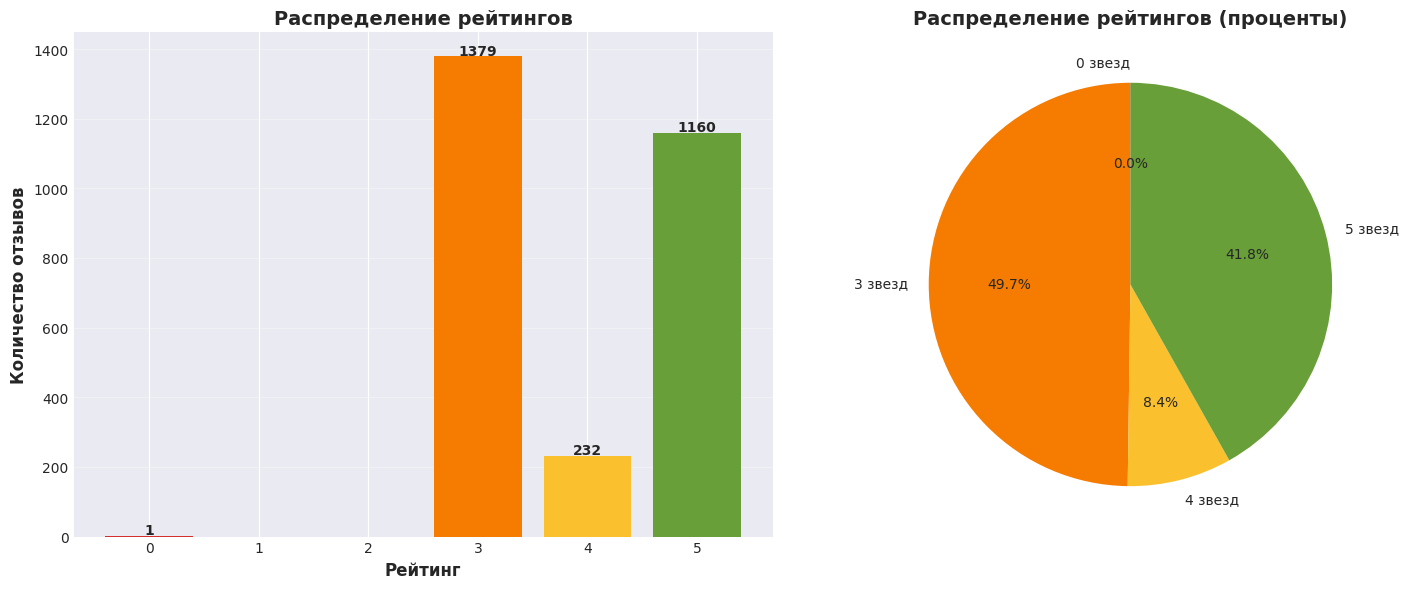

⭐ Средний рейтинг: 3.92
📊 Медианный рейтинг: 4

📈 Распределение:
  0 звезд: 1 отзывов (0.0%)
  3 звезд: 1379 отзывов (49.7%)
  4 звезд: 232 отзывов (8.4%)
  5 звезд: 1160 отзывов (41.8%)


In [18]:
# Распределение рейтингов
# Проверка готовности данных
if 'df_all' not in globals():
    raise NameError("❌ Ошибка: Сначала выполните ячейки 1, 2 и 3!")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
rating_counts = df_all['rating'].value_counts().sort_index()
axes[0].bar(rating_counts.index, rating_counts.values, color=['#d32f2f', '#f57c00', '#fbc02d', '#689f38', '#388e3c'])
axes[0].set_xlabel('Рейтинг', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[0].set_title('Распределение рейтингов', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

# Круговая диаграмма
colors_pie = ['#d32f2f', '#f57c00', '#fbc02d', '#689f38', '#388e3c']
axes[1].pie(rating_counts.values, labels=[f'{i} звезд' for i in rating_counts.index], 
            autopct='%1.1f%%', startangle=90, colors=colors_pie)
axes[1].set_title('Распределение рейтингов (проценты)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Статистика
print(f"⭐ Средний рейтинг: {df_all['rating'].mean():.2f}")
print(f"📊 Медианный рейтинг: {df_all['rating'].median():.0f}")
print(f"\n📈 Распределение:")
for rating in sorted(rating_counts.index):
    count = rating_counts[rating]
    percentage = (count / len(df_all)) * 100
    print(f"  {rating} звезд: {count} отзывов ({percentage:.1f}%)")


## 2. Распределение отзывов по источникам

Анализ того, с каких платформ приходят отзывы (2GIS, Yandex и т.д.).


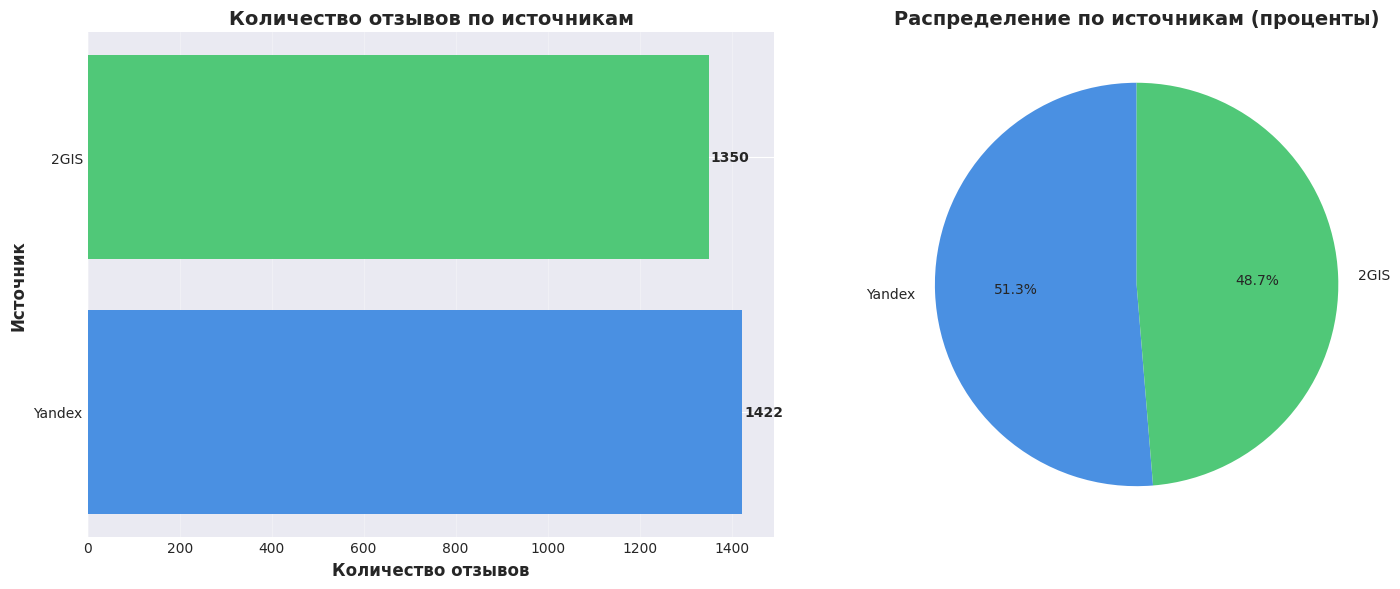

📊 Статистика по источникам:
  Yandex: 1422 отзывов (51.3%), средний рейтинг: 4.79
  2GIS: 1350 отзывов (48.7%), средний рейтинг: 3.00


In [19]:
# Распределение по источникам
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

source_counts = df_all['source'].value_counts()

# Столбчатая диаграмма
axes[0].barh(source_counts.index, source_counts.values, color=['#4a90e2', '#50c878', '#ff6b6b'])
axes[0].set_xlabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Источник', fontsize=12, fontweight='bold')
axes[0].set_title('Количество отзывов по источникам', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(source_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# Круговая диаграмма
axes[1].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#4a90e2', '#50c878', '#ff6b6b'])
axes[1].set_title('Распределение по источникам (проценты)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Статистика по источникам:")
for source in source_counts.index:
    count = source_counts[source]
    percentage = (count / len(df_all)) * 100
    avg_rating = df_all[df_all['source'] == source]['rating'].mean()
    print(f"  {source}: {count} отзывов ({percentage:.1f}%), средний рейтинг: {avg_rating:.2f}")


## 3. Динамика отзывов во времени

График показывает, как менялось количество отзывов по месяцам и дням недели.


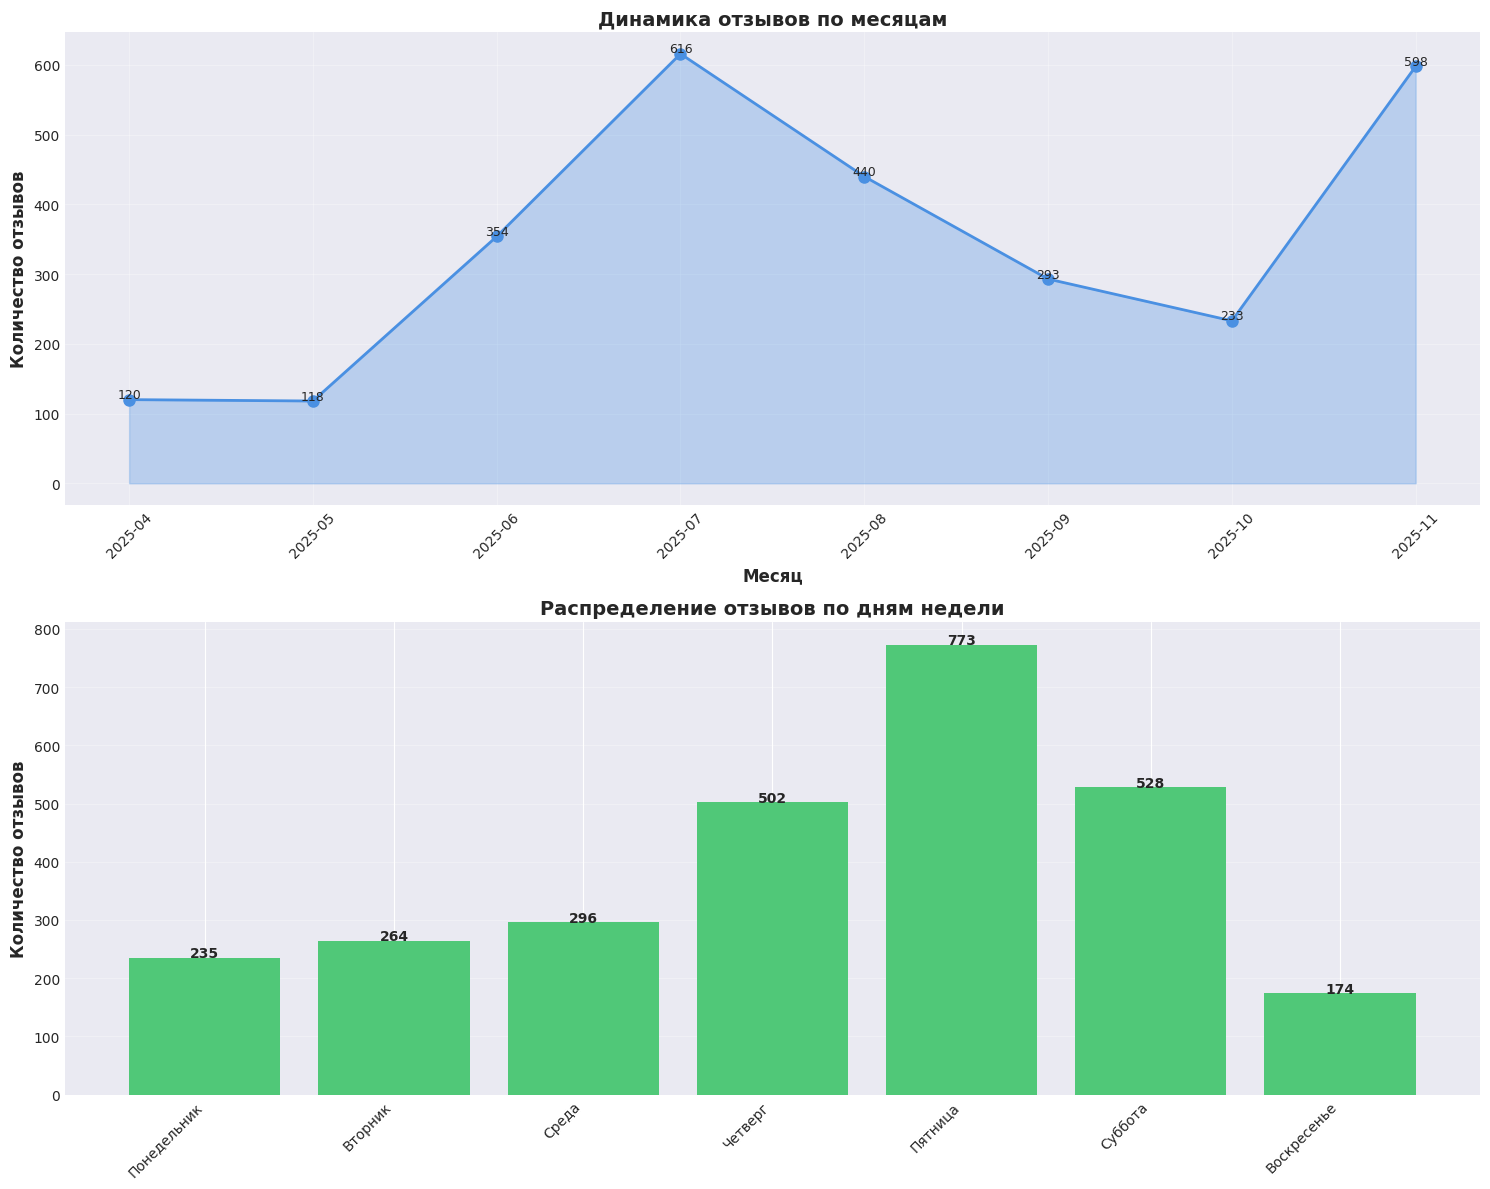

📅 Статистика по времени:
  Самый активный месяц: 2025-07 (616 отзывов)
  Самый активный день недели: Friday (773 отзывов)


In [20]:
# Динамика отзывов во времени
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# По месяцам
monthly_counts = df_all.groupby('month_name').size().sort_index()
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=8, color='#4a90e2')
axes[0].fill_between(monthly_counts.index, monthly_counts.values, alpha=0.3, color='#4a90e2')
axes[0].set_xlabel('Месяц', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[0].set_title('Динамика отзывов по месяцам', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(monthly_counts.values):
    axes[0].text(monthly_counts.index[i], v + 2, str(v), ha='center', fontsize=9)

# По дням недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_ru = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
day_counts = df_all['day_of_week'].value_counts()
day_counts = day_counts.reindex([d for d in day_order if d in day_counts.index])

axes[1].bar(range(len(day_counts)), day_counts.values, color='#50c878')
axes[1].set_xticks(range(len(day_counts)))
axes[1].set_xticklabels([day_order_ru[day_order.index(d)] for d in day_counts.index], rotation=45, ha='right')
axes[1].set_ylabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[1].set_title('Распределение отзывов по дням недели', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(day_counts.values):
    axes[1].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("📅 Статистика по времени:")
print(f"  Самый активный месяц: {monthly_counts.idxmax()} ({monthly_counts.max()} отзывов)")
print(f"  Самый активный день недели: {day_counts.idxmax()} ({day_counts.max()} отзывов)")


## 4. Анализ длины отзывов

Гистограмма показывает распределение длины отзывов (количество символов и слов).


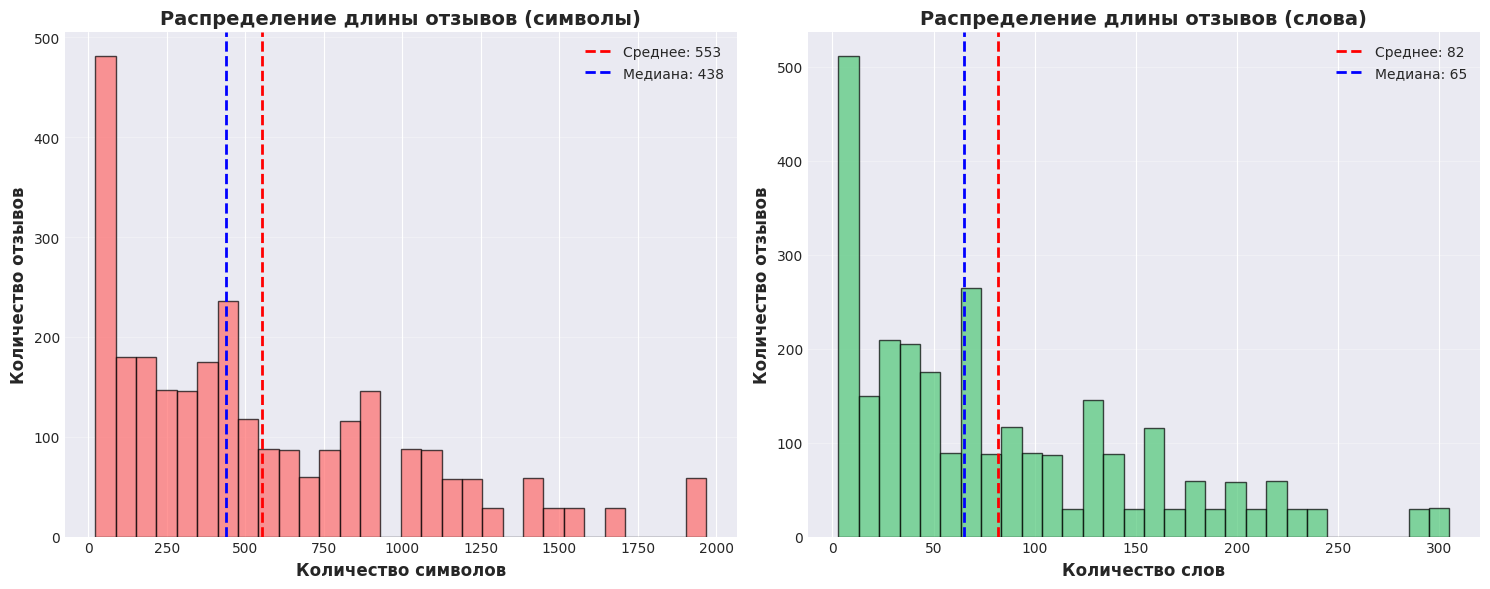

📏 Статистика по длине отзывов:
  Средняя длина (символы): 553
  Медианная длина (символы): 438
  Минимальная длина: 22 символов
  Максимальная длина: 1969 символов

  Среднее количество слов: 82
  Медианное количество слов: 65


In [21]:
# Анализ длины отзывов
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Распределение по количеству символов
axes[0].hist(df_all['text_length'], bins=30, color='#ff6b6b', edgecolor='black', alpha=0.7)
axes[0].axvline(df_all['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df_all["text_length"].mean():.0f}')
axes[0].axvline(df_all['text_length'].median(), color='blue', linestyle='--', linewidth=2, label=f'Медиана: {df_all["text_length"].median():.0f}')
axes[0].set_xlabel('Количество символов', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[0].set_title('Распределение длины отзывов (символы)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Распределение по количеству слов
axes[1].hist(df_all['word_count'], bins=30, color='#50c878', edgecolor='black', alpha=0.7)
axes[1].axvline(df_all['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df_all["word_count"].mean():.0f}')
axes[1].axvline(df_all['word_count'].median(), color='blue', linestyle='--', linewidth=2, label=f'Медиана: {df_all["word_count"].median():.0f}')
axes[1].set_xlabel('Количество слов', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Количество отзывов', fontsize=12, fontweight='bold')
axes[1].set_title('Распределение длины отзывов (слова)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📏 Статистика по длине отзывов:")
print(f"  Средняя длина (символы): {df_all['text_length'].mean():.0f}")
print(f"  Медианная длина (символы): {df_all['text_length'].median():.0f}")
print(f"  Минимальная длина: {df_all['text_length'].min():.0f} символов")
print(f"  Максимальная длина: {df_all['text_length'].max():.0f} символов")
print(f"\n  Среднее количество слов: {df_all['word_count'].mean():.0f}")
print(f"  Медианное количество слов: {df_all['word_count'].median():.0f}")


## 5. Топ авторов по количеству отзывов

Показывает самых активных авторов отзывов.


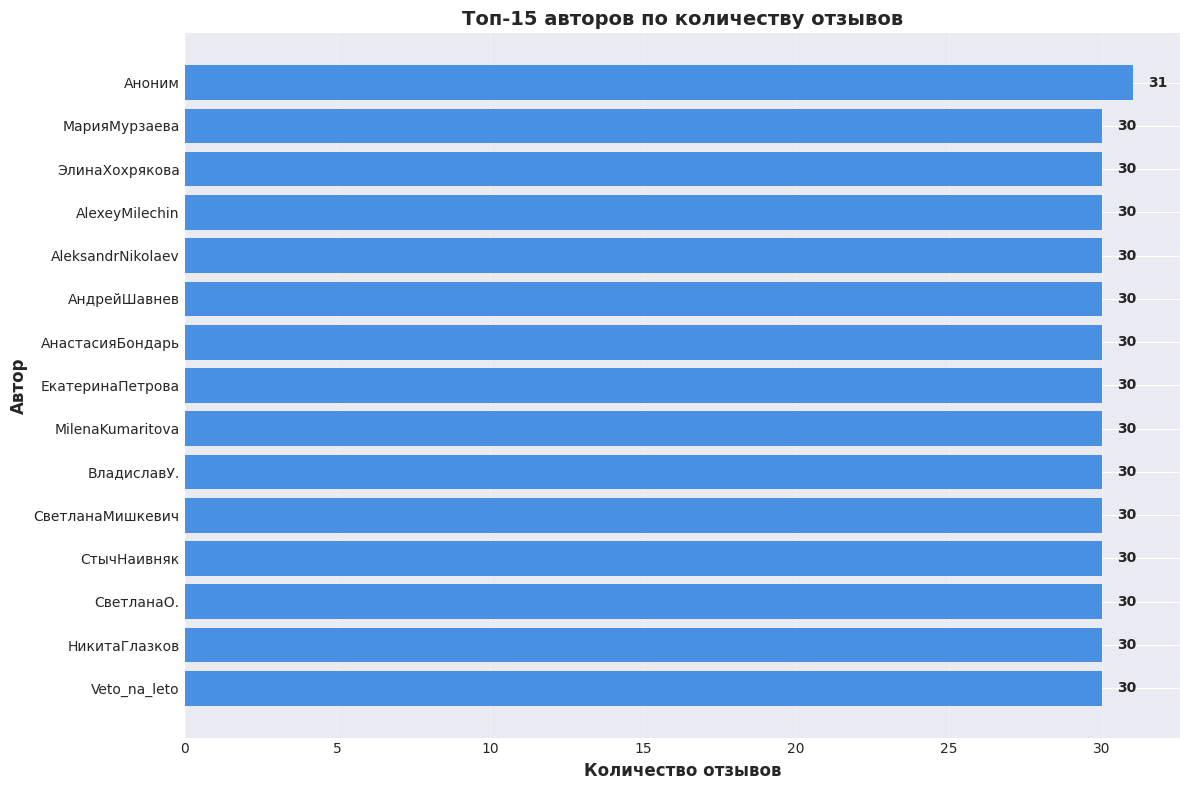

👥 Топ-10 авторов:
  1. Аноним: 31 отзывов, средний рейтинг: 2.90
  2. МарияМурзаева: 30 отзывов, средний рейтинг: 3.00
  3. ЭлинаХохрякова: 30 отзывов, средний рейтинг: 3.00
  4. AlexeyMilechin: 30 отзывов, средний рейтинг: 3.00
  5. AleksandrNikolaev: 30 отзывов, средний рейтинг: 3.00
  6. АндрейШавнев: 30 отзывов, средний рейтинг: 3.00
  7. АнастасияБондарь: 30 отзывов, средний рейтинг: 3.00
  8. ЕкатеринаПетрова: 30 отзывов, средний рейтинг: 3.00
  9. MilenaKumaritova: 30 отзывов, средний рейтинг: 3.00
  10. ВладиславУ.: 30 отзывов, средний рейтинг: 3.00


In [22]:
# Топ авторов
top_authors = df_all['author'].value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_authors)), top_authors.values, color='#4a90e2')
plt.yticks(range(len(top_authors)), top_authors.index)
plt.xlabel('Количество отзывов', fontsize=12, fontweight='bold')
plt.ylabel('Автор', fontsize=12, fontweight='bold')
plt.title('Топ-15 авторов по количеству отзывов', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(top_authors.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("👥 Топ-10 авторов:")
for i, (author, count) in enumerate(top_authors.head(10).items(), 1):
    avg_rating = df_all[df_all['author'] == author]['rating'].mean()
    print(f"  {i}. {author}: {count} отзывов, средний рейтинг: {avg_rating:.2f}")


## 6. Сравнение средних рейтингов по источникам

Сравнение качества отзывов (средний рейтинг) между разными источниками.


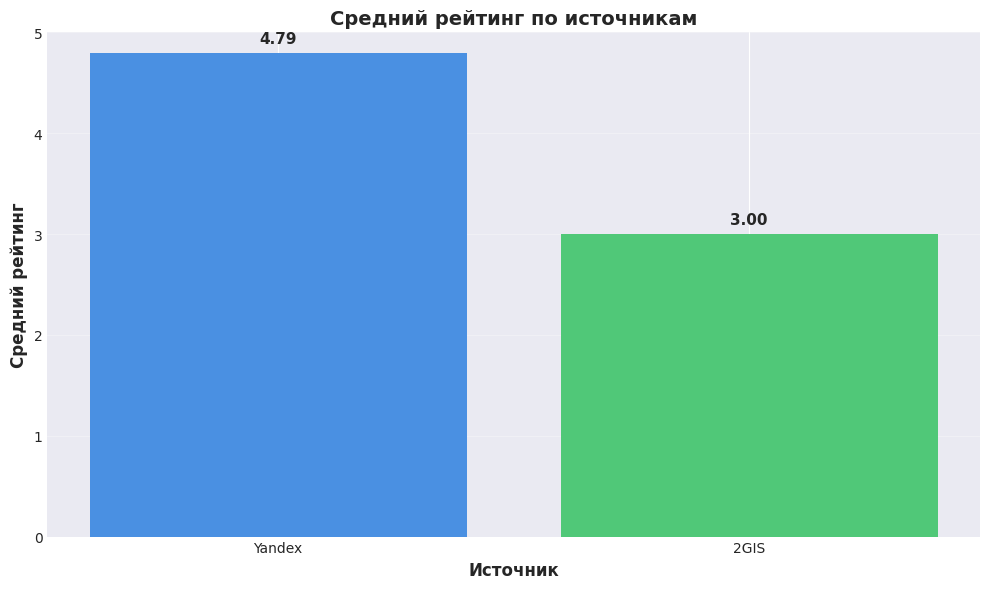

⭐ Средние рейтинги по источникам:
  Yandex: 4.79 (1422 отзывов)
  2GIS: 3.00 (1350 отзывов)


In [23]:
# Средний рейтинг по источникам
avg_rating_by_source = df_all.groupby('source')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_rating_by_source.index, avg_rating_by_source.values, 
               color=['#4a90e2', '#50c878', '#ff6b6b'])
plt.xlabel('Источник', fontsize=12, fontweight='bold')
plt.ylabel('Средний рейтинг', fontsize=12, fontweight='bold')
plt.title('Средний рейтинг по источникам', fontsize=14, fontweight='bold')
plt.ylim(0, 5)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(avg_rating_by_source.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("⭐ Средние рейтинги по источникам:")
for source, rating in avg_rating_by_source.items():
    count = len(df_all[df_all['source'] == source])
    print(f"  {source}: {rating:.2f} ({count} отзывов)")


## 7. Корреляция между рейтингом и длиной отзыва

Проверяем, есть ли связь между оценкой и длиной отзыва.


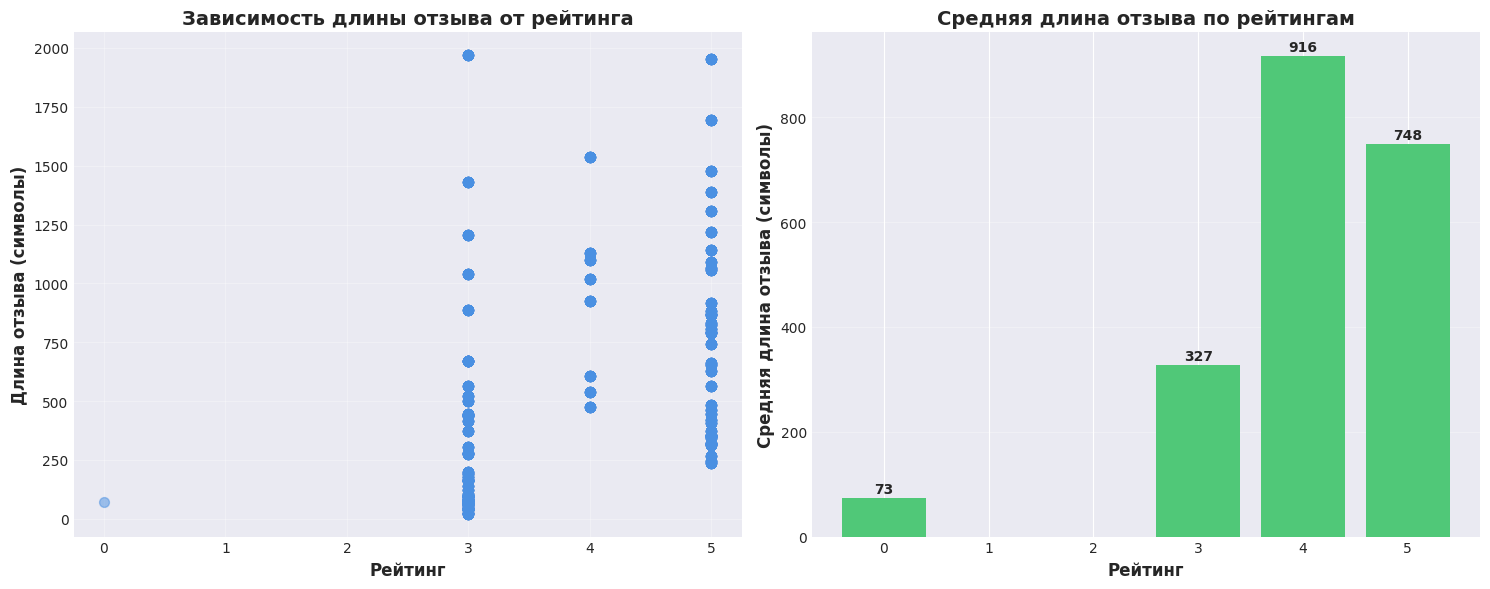

📊 Корреляция между рейтингом и длиной отзыва: 0.438

📏 Средняя длина отзыва по рейтингам:
  0 звезд: 73 символов
  3 звезд: 327 символов
  4 звезд: 916 символов
  5 звезд: 748 символов


In [24]:
# Корреляция рейтинга и длины отзыва
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Точечная диаграмма
axes[0].scatter(df_all['rating'], df_all['text_length'], alpha=0.5, s=50, color='#4a90e2')
axes[0].set_xlabel('Рейтинг', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Длина отзыва (символы)', fontsize=12, fontweight='bold')
axes[0].set_title('Зависимость длины отзыва от рейтинга', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Средняя длина по рейтингам
avg_length_by_rating = df_all.groupby('rating')['text_length'].mean()
axes[1].bar(avg_length_by_rating.index, avg_length_by_rating.values, color='#50c878')
axes[1].set_xlabel('Рейтинг', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Средняя длина отзыва (символы)', fontsize=12, fontweight='bold')
axes[1].set_title('Средняя длина отзыва по рейтингам', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_length_by_rating.values):
    axes[1].text(avg_length_by_rating.index[i], v + 10, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

correlation = df_all['rating'].corr(df_all['text_length'])
print(f"📊 Корреляция между рейтингом и длиной отзыва: {correlation:.3f}")
print("\n📏 Средняя длина отзыва по рейтингам:")
for rating in sorted(avg_length_by_rating.index):
    print(f"  {rating} звезд: {avg_length_by_rating[rating]:.0f} символов")


## 8. Тепловая карта активности

Тепловая карта показывает активность отзывов по месяцам и рейтингам.


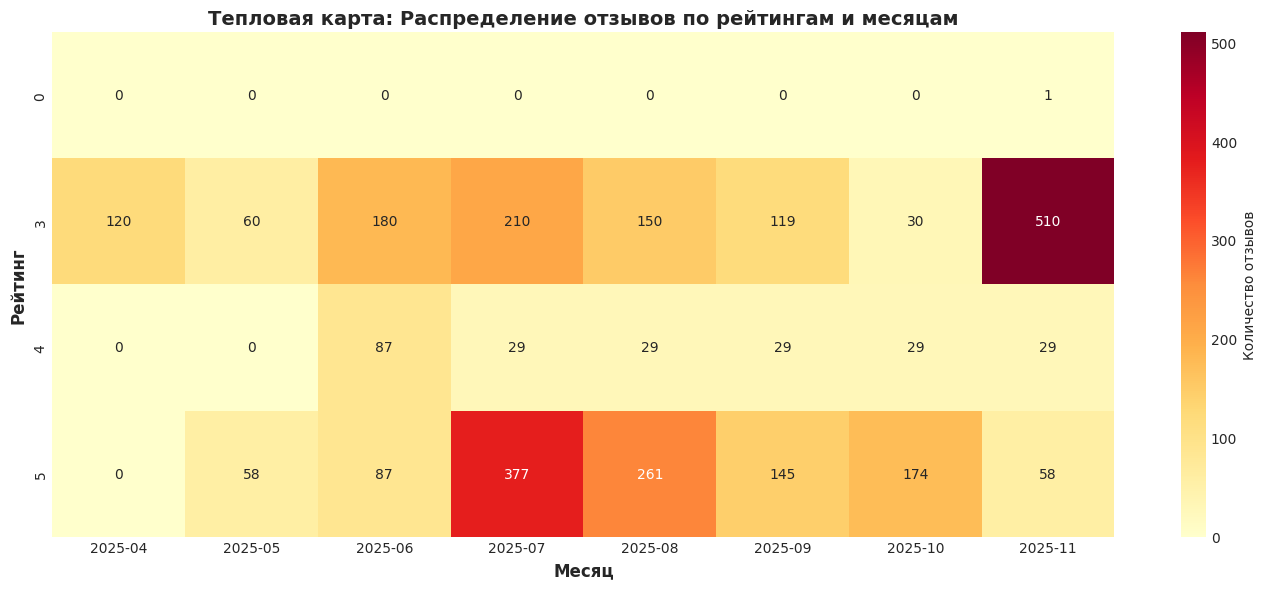

🔥 Тепловая карта показывает активность отзывов по месяцам и рейтингам


In [25]:
# Тепловая карта: рейтинг vs месяц
heatmap_data = df_all.pivot_table(values='id', index='rating', columns='month_name', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество отзывов'})
plt.xlabel('Месяц', fontsize=12, fontweight='bold')
plt.ylabel('Рейтинг', fontsize=12, fontweight='bold')
plt.title('Тепловая карта: Распределение отзывов по рейтингам и месяцам', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔥 Тепловая карта показывает активность отзывов по месяцам и рейтингам")


## 9. Общая статистика и выводы

Итоговая статистика по всем данным.


In [26]:
# Итоговая статистика
print("=" * 60)
print("📊 ИТОГОВАЯ СТАТИСТИКА ПО ОТЗЫВАМ")
print("=" * 60)

print(f"\n📈 Общие показатели:")
print(f"  Всего отзывов: {len(df_all)}")
print(f"  Средний рейтинг: {df_all['rating'].mean():.2f}")
print(f"  Медианный рейтинг: {df_all['rating'].median():.0f}")
print(f"  Средняя длина отзыва: {df_all['text_length'].mean():.0f} символов ({df_all['word_count'].mean():.0f} слов)")

print(f"\n📅 Временной период:")
print(f"  Первый отзыв: {df_all['date'].min()}")
print(f"  Последний отзыв: {df_all['date'].max()}")
print(f"  Период: {(df_all['date'].max() - df_all['date'].min()).days} дней")

print(f"\n⭐ Распределение рейтингов:")
for rating in sorted(df_all['rating'].value_counts().index):
    count = df_all[df_all['rating'] == rating].shape[0]
    percentage = (count / len(df_all)) * 100
    print(f"  {rating} звезд: {count} ({percentage:.1f}%)")

print(f"\n🌐 По источникам:")
for source in df_all['source'].value_counts().index:
    count = df_all[df_all['source'] == source].shape[0]
    avg_rating = df_all[df_all['source'] == source]['rating'].mean()
    print(f"  {source}: {count} отзывов, средний рейтинг: {avg_rating:.2f}")

print(f"\n👥 Авторы:")
print(f"  Уникальных авторов: {df_all['author'].nunique()}")
print(f"  Самый активный автор: {df_all['author'].value_counts().index[0]} ({df_all['author'].value_counts().iloc[0]} отзывов)")

print("\n" + "=" * 60)


📊 ИТОГОВАЯ СТАТИСТИКА ПО ОТЗЫВАМ

📈 Общие показатели:
  Всего отзывов: 2772
  Средний рейтинг: 3.92
  Медианный рейтинг: 4
  Средняя длина отзыва: 553 символов (82 слов)

📅 Временной период:
  Первый отзыв: 2025-04-23 00:00:00
  Последний отзыв: 2025-11-14 00:00:00
  Период: 205 дней

⭐ Распределение рейтингов:
  0 звезд: 1 (0.0%)
  3 звезд: 1379 (49.7%)
  4 звезд: 232 (8.4%)
  5 звезд: 1160 (41.8%)

🌐 По источникам:
  Yandex: 1422 отзывов, средний рейтинг: 4.79
  2GIS: 1350 отзывов, средний рейтинг: 3.00

👥 Авторы:
  Уникальных авторов: 94
  Самый активный автор: Аноним (31 отзывов)

